In [21]:
%load_ext autoreload
%autoreload 2
# from cnn_mnist_norm import CnnMnist
from resnet18_cifar10 import RN18CIFAR as CnnMnist

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
model_a = CnnMnist(
    weight_init_seed = 0,
    batching_seed = 0,
    dataset_rank=1,
    dataset_worldsize=1)
model_b = CnnMnist(
    weight_init_seed= 1,
    batching_seed= 1,
    dataset_rank=1,
    dataset_worldsize=1)


In [23]:
# from concurrent.futures import ProcessPoolExecutor
# with ProcessPoolExecutor() as executor:
#     future1 = executor.submit(model_a.train, lr=5e-2, epoches=8, device='cuda:0')
#     future2 = executor.submit(model_b.train, lr=5e-2, epoches=8, device='cuda:1')
#     future1.result()
#     future2.result()

# import torch.multiprocessing as mp
# mp.set_start_method('spawn', force=True)

# # model_a.model.to('cuda')
# model_a.model.share_memory()
# model_b.model.share_memory()

# processes = []
# for i, model in enumerate((model_a, model_b)):
#     p = mp.Process(target=model.train, kwargs={'lr':1e-1, 'epoches':3, 'device':f'cuda:{i}'})
#     p.start()
#     processes.append(p)
# for p in processes:
#     p.join()

from concurrent.futures import ThreadPoolExecutor
with ThreadPoolExecutor() as executor:
    future1 = executor.submit(model_a.train, lr=5e-2, epoches=8, device='cuda:0')
    future2 = executor.submit(model_b.train, lr=5e-2, epoches=8, device='cuda:1')
    future1.result()
    future2.result()
    
model_a.validate()

Using device cuda:0
Using device cuda:1
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch 1:	Train loss: 1.567587	Test loss: 1.569202	Test accuracy: 0.445700
Files already downloaded and verified
Epoch 1:	Train loss: 1.567830	Test loss: 0.983895	Test accuracy: 0.456100
Epoch 2:	Train loss: 1.395330	Test loss: 1.500052	Test accuracy: 0.500100
Epoch 2:	Train loss: 1.246289	Test loss: 0.881661	Test accuracy: 0.444800
Epoch 3:	Train loss: 1.236014	Test loss: 1.170844	Test accuracy: 0.522600
Epoch 3:	Train loss: 1.306420	Test loss: 0.904155	Test accuracy: 0.569000
Epoch 4:	Train loss: 1.086682	Test loss: 1.229863	Test accuracy: 0.596800
Epoch 4:	Train loss: 1.133131	Test loss: 0.673338	Test accuracy: 0.588600
Epoch 5:	Train loss: 1.231284	Test loss: 0.788647	Test accuracy: 0.584000
Epoch 5:	Train loss: 1.221081	Test loss: 1.608015	Test accuracy: 0.534100
Epoch 6:	Train loss: 1.036212	Test loss: 0.863232	Test accuracy: 0.6

(0.6859, -1)

In [24]:
# list(model_a.state_dict.keys())

In [25]:
model_a.validate()

(Accuracy, Loss=-1)


(0.6859, -1)

In [26]:
permutations = model_a.match_weights(model_b, seed=2, )
# permutations

0/P_layer1.1_inner: 21.514026659060534
0/P_bg0: 25.100965913412352
0/P_layer4.0_inner: 54.14914663234276
0/P_bg3: 85.67409289033617
0/P_layer4.1_inner: 31.65002186778554
0/P_bg2: 19.82220942825211
0/P_layer2.1_inner: 28.154430965743344
0/P_layer3.0_inner: 29.97078051405998
0/P_layer2.0_inner: 21.046183115877625
0/P_bg1: 0.002219437793087309
0/P_layer3.1_inner: 29.737873630915885
0/P_layer1.0_inner: 12.387881595670706
1/P_bg0: 0.19232835188722675
1/P_layer3.0_inner: 0.815874413146787
1/P_bg3: 8.364190786242261
1/P_layer1.0_inner: 0.5790334541649429
1/P_layer1.1_inner: 9.595298683455212
1/P_layer2.0_inner: 1.4121318974955557
1/P_layer3.1_inner: 0.0
1/P_bg1: 0.0
1/P_layer4.1_inner: 10.378207140017707
1/P_layer2.1_inner: 1.153600352947933
1/P_layer4.0_inner: 26.859089669409173
1/P_bg2: 0.0
2/P_layer2.0_inner: 0.0
2/P_layer4.0_inner: 0.0
2/P_layer4.1_inner: 0.0
2/P_bg1: 0.0
2/P_bg0: 0.0
2/P_layer1.0_inner: 0.0
2/P_bg3: 0.08323784347885521
2/P_layer2.1_inner: 0.0
2/P_layer3.1_inner: 0.0
2/P_

In [27]:
model_b_permuted = model_b.get_permuted_model(permutations, recalc_bn_statistics=True, )

Files already downloaded and verified


In [28]:
model_b.validate()

(Accuracy, Loss=-1)


(0.6756, -1)

In [29]:
model_b_permuted.validate()

(Accuracy, Loss=-1)


(0.6795, -1)

In [30]:
blend_model = model_a.get_blend_model(model_b_permuted, 0.5, recalc_bn_statistics=True)
blend_model.validate()

Files already downloaded and verified
(Accuracy, Loss=-1)


(0.2262, -1)

In [10]:
blend_model = model_a.get_blend_model(model_b, 0.5, recalc_bn_statistics=True)
blend_model.validate()

Files already downloaded and verified
(Accuracy, Loss=-1)


(0.1355, -1)

Files already downloaded and verified
Files already downloaded and verified
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
Files already downloaded and verified
Files already downloaded and verified
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
Files already downloaded and verified
Files already downloaded and verified
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
Files already downloaded and verified
Files already downloaded and verified
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
Files already downloaded and verified
Files already downloaded and verified
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
Files already downloaded and verified
Files already downloaded and verified
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
Files already downloaded and verified
Files already downloaded and verified
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
Files already downloaded and verified
Files already downloaded and verified
(Accuracy, Loss=-1)
(Accuracy, Loss=-1)
Files already downloaded and verified
Files already downloaded and verif

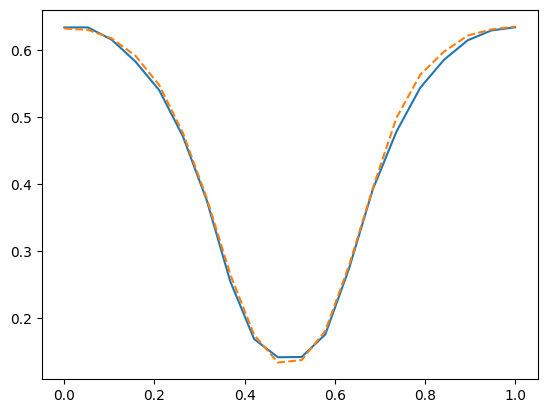

In [11]:
import numpy as np
import matplotlib.pyplot as plt

lambdas, accs, accs_tupo = [], [], []
for _lambda in np.linspace(0, 1, 20):
    blend_model = model_a.get_blend_model(model_b_permuted, _lambda, recalc_bn_statistics=True)
    
    blend_model_tupo = model_a.get_blend_model(model_b, _lambda, recalc_bn_statistics=True)    
    
    acc, _ = blend_model.validate()
    accs.append(acc)
    
    acc_tupo, _ = blend_model_tupo.validate()
    accs_tupo.append(acc_tupo)
                                               
    lambdas.append(_lambda)

plt.plot(lambdas, accs)
plt.plot(lambdas, accs_tupo, '--')